# Spaceship Titanic: модель предсказания выживаемости

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Загрузка данных

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(5)
#test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Удаляем неинформативные столбцы

In [3]:
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
train_df.head(5)
#test_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Выводим информацию

In [4]:
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


Поменяем тип столбцов CryoSleep и VIP на bool:

In [5]:
columns_to_bool = ["CryoSleep", "VIP"]
train_df[columns_to_bool] = train_df[columns_to_bool].astype('bool')
test_df[columns_to_bool] = test_df[columns_to_bool].astype('bool')


Выводим информацию

In [6]:
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(2)
memory usage: 568.9+ KB


Выбираем некатегориальные переменные

In [7]:
num_df = train_df.select_dtypes(exclude=['object'])

Строим корреляционную матрицу

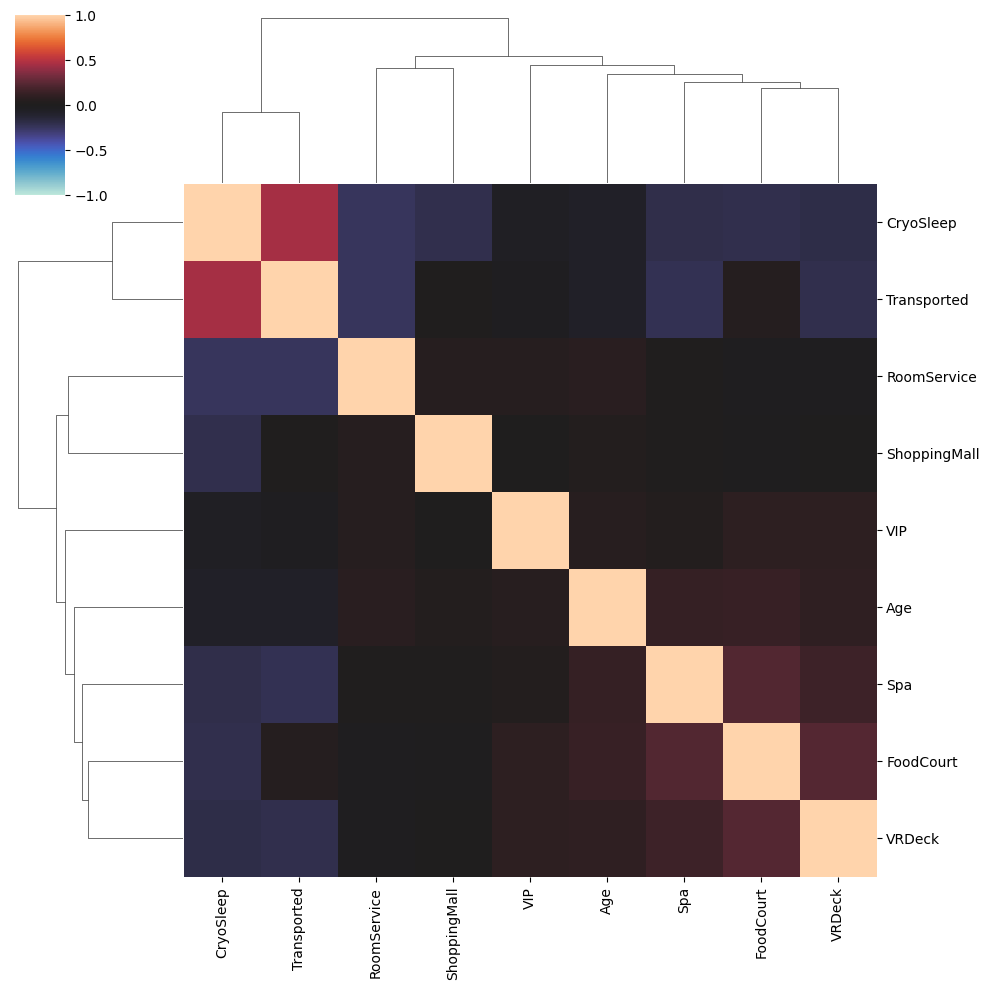

In [8]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(num_df, annot=None)

Видим, что есть корреляция между переменными CryoSleep и Transported

Смотрим размер датасета

In [9]:
train_df.shape

(8693, 11)

Смотрим описание некатегориальных переменных

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Смотрим нулевые переменные

In [11]:
train_df.isnull().sum()
#test_df.isnull().sum()

HomePlanet      201
CryoSleep         0
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [12]:
df = train_df.dropna()
print("Если удалять строки с NaN-ми, будет потеряно следующее количество строк: ", train_df.shape[0] - df.shape[0])

Если удалять строки с NaN-ми, будет потеряно следующее количество строк:  1412


Собераем статистику связанную с NaN-ми.

In [13]:
nan_df = (train_df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df

,column_name,percentage
7,ShoppingMall,2.392730
0,HomePlanet,2.312205
9,VRDeck,2.162660
6,FoodCourt,2.105142
8,Spa,2.105142
2,Destination,2.093639
5,RoomService,2.082135
3,Age,2.059128
1,CryoSleep,0.000000
4,VIP,0.000000


Удалять большое количество строк не целесообразно, поэтому заполним NaN-ы для стобца Age средним значением, а для столбцов RoomService, FoodCourt, ShoppingMall, Spa и VRDeck NaN-ы заполним модой(такое решение было принято основываясь на гистограммах в описании датасета).
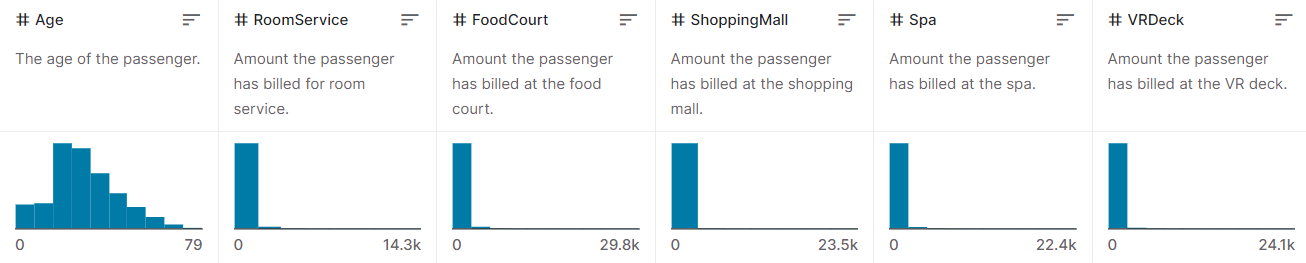

Выбираем колонки, где надо заполнять пустые места

In [14]:
num_сols_with_missing = [col for col in num_df.columns if num_df[col].isnull().any()]
num_сols_with_missing

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

Заполняем возраст

In [15]:
train_df['Age'] = train_df['Age'].transform(lambda x: x.fillna(x.mean()))
test_df['Age'] = test_df['Age'].transform(lambda x: x.fillna(x.mean()))

Заполняем остальные столбцы

In [16]:
num_сols_with_missing = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[num_сols_with_missing] = train_df[num_сols_with_missing].transform(lambda x: x.fillna(x.dropna().mode()[0]))
test_df[num_сols_with_missing] = test_df[num_сols_with_missing].transform(lambda x: x.fillna(x.dropna().mode()[0]))

Выбираем категориальные переменные

In [17]:
cat_df = train_df.select_dtypes(include=['object'])

In [18]:
cat_сols_with_missing = [col for col in cat_df.columns if cat_df[col].isnull().any()]
cat_сols_with_missing

['HomePlanet', 'Destination']

### Столбцы HomePlanet и Destination заполним модой(используем описание датасета).
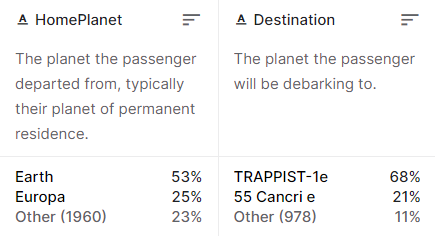

In [19]:
cat_сols_with_missing = ['HomePlanet', 'Destination']
train_df[cat_сols_with_missing] = train_df[cat_сols_with_missing].transform(lambda x: x.fillna(x.dropna().mode()[0]))
test_df[cat_сols_with_missing] = test_df[cat_сols_with_missing].transform(lambda x: x.fillna(x.dropna().mode()[0]))

Построим ящики с усами и удалим экстременальные значения, если такие есть.

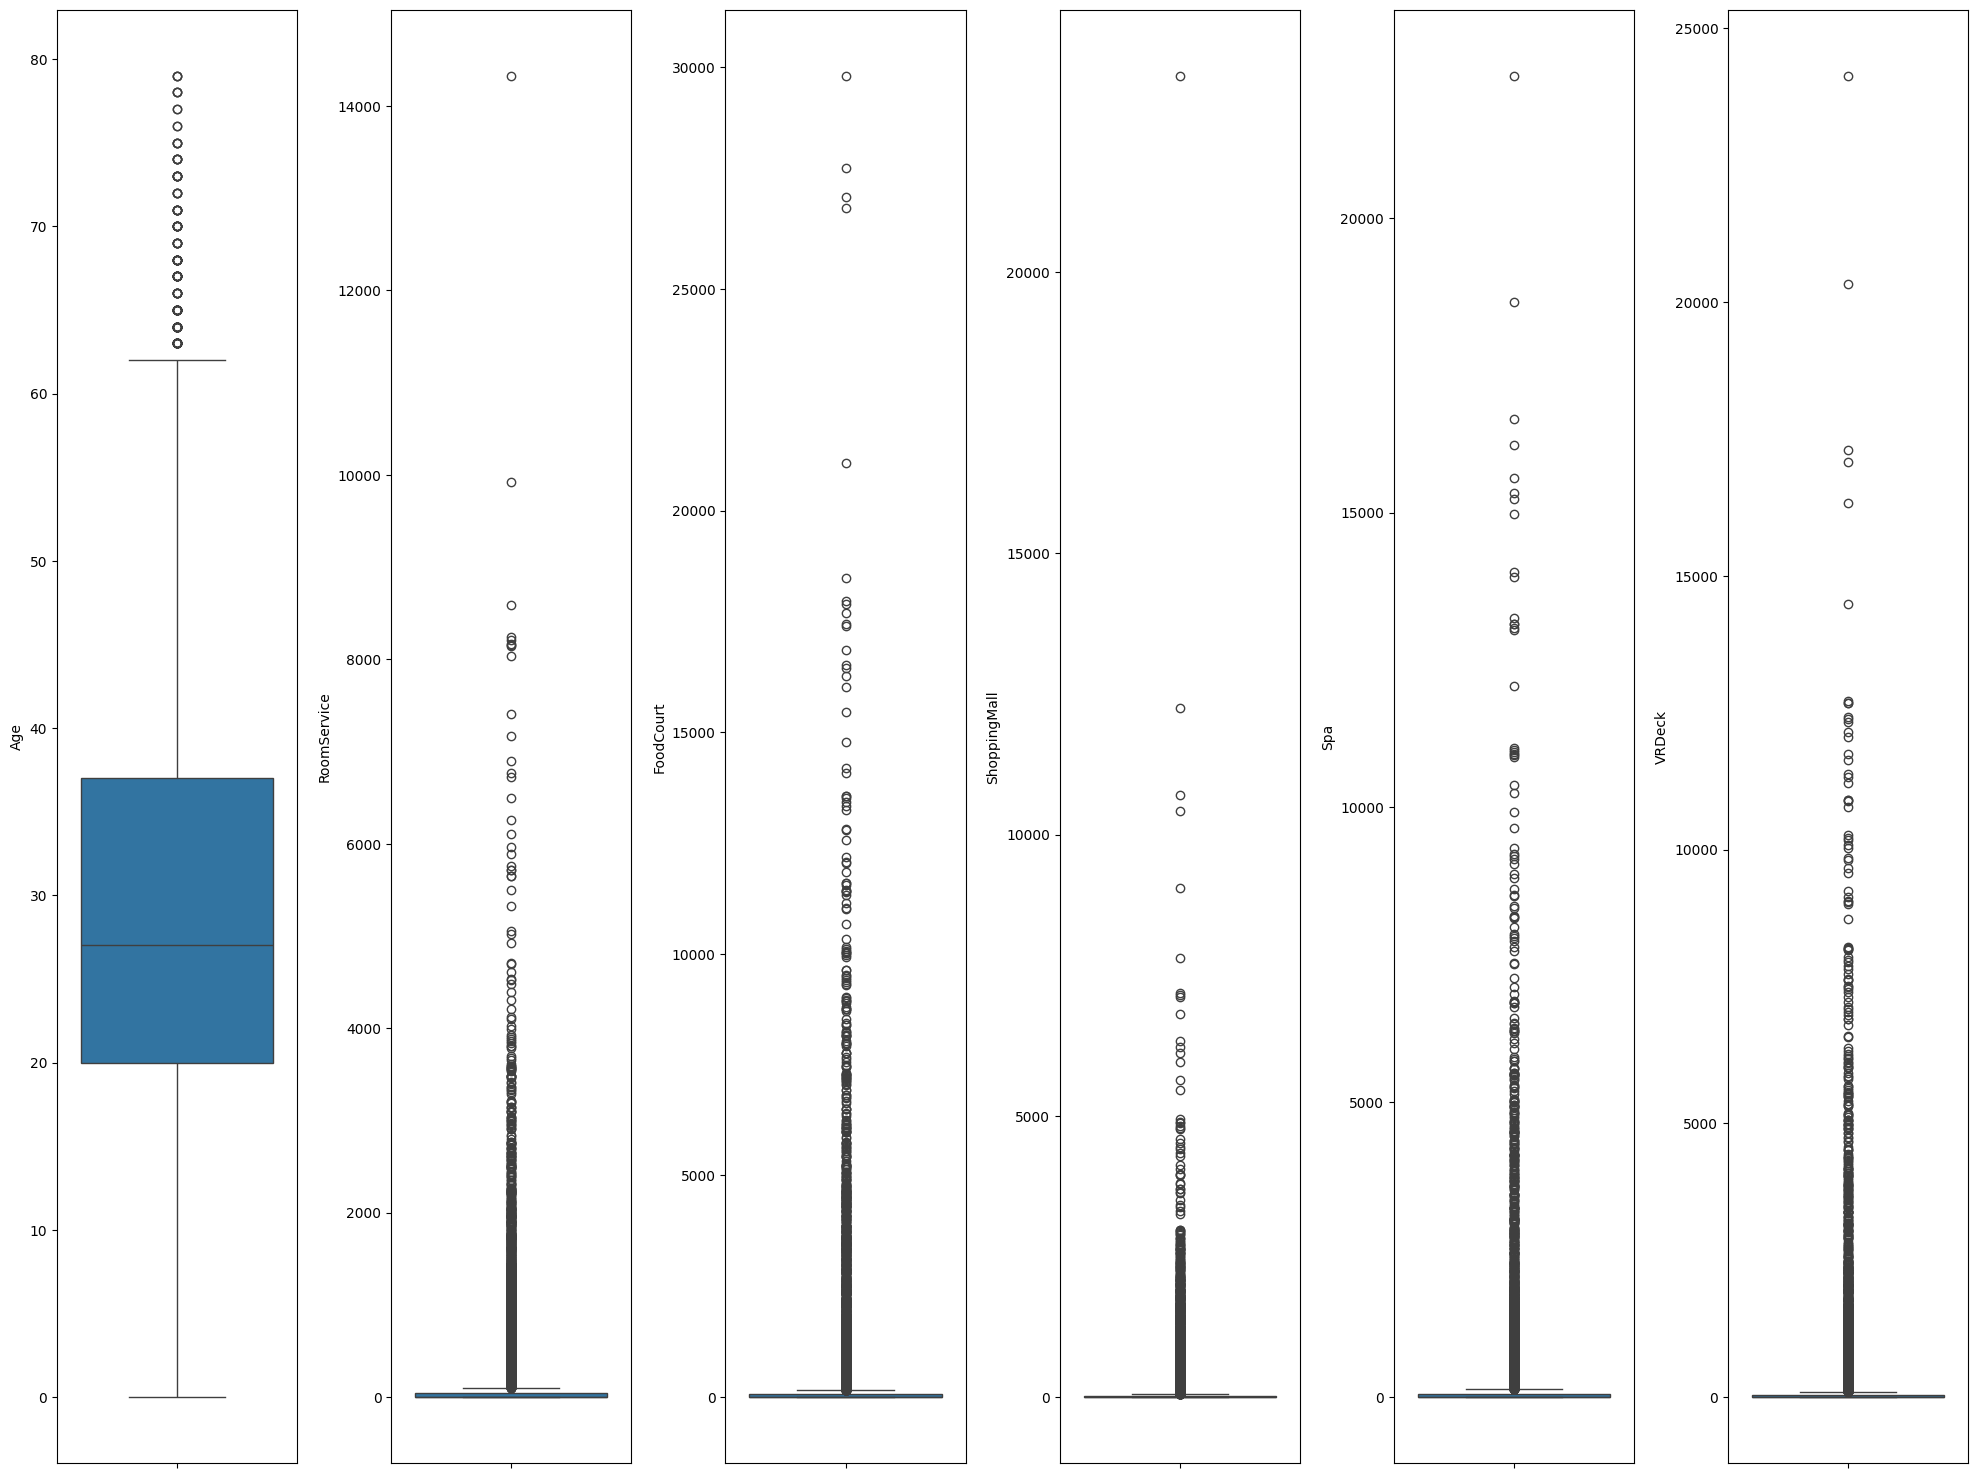

In [20]:
out_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(1, 6, figsize=(20, 15))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

In [21]:
for col, upper_bound in (
    ('RoomService', 5000),
    ('FoodCourt', 20000),
    ('ShoppingMall', 5000),
    ('Spa', 9500),
    ('VRDeck', 14000),
):
    train_df = train_df.drop(train_df[train_df[col] > upper_bound].index)

# Feature Engineering

In [22]:
cat_df = train_df.select_dtypes(include=['object'])
cat_df.columns

Index(['HomePlanet', 'Destination'], dtype='object')

### Проверим количество уникальных значений в каждом столбце

In [23]:
for column in cat_df: print(column, cat_df[column].nunique())

HomePlanet 3
Destination 3


Заменим значения их частотой

In [24]:
enc_nom_1 = (train_df.groupby('HomePlanet').size()) / len(train_df)
enc_nom_1

HomePlanet
Earth     0.557181
Europa    0.240334
Mars      0.202485
dtype: float64

In [25]:
enc_nom_2 = (train_df.groupby('Destination').size()) / len(train_df)
enc_nom_2

Destination
55 Cancri e      0.205039
PSO J318.5-22    0.092302
TRAPPIST-1e      0.702659
dtype: float64

In [26]:
enc_nom_3 = (test_df.groupby('HomePlanet').size()) / len(test_df)
enc_nom_3

HomePlanet
Earth     0.549451
Europa    0.234276
Mars      0.216273
dtype: float64

In [27]:
enc_nom_4 = (test_df.groupby('Destination').size()) / len(test_df)
enc_nom_4

Destination
55 Cancri e      0.196633
PSO J318.5-22    0.090718
TRAPPIST-1e      0.712649
dtype: float64

Для столбцов HomePlanet и Destination воспользуемся Frequency Encoding, как можно заметить из описания датасета

In [28]:
train_df['HomePlanet'] = train_df['HomePlanet'].apply(lambda x : enc_nom_1[x])
train_df['Destination'] = train_df['Destination'].apply(lambda x : enc_nom_2[x])
test_df['HomePlanet'] = test_df['HomePlanet'].apply(lambda x : enc_nom_3[x])
test_df['Destination'] = test_df['Destination'].apply(lambda x : enc_nom_4[x])

# Преобразованный датасет имеет следующий вид:

In [29]:
train_df.head(5)
#test_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.240334,False,0.702659,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0.557181,False,0.702659,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0.240334,False,0.702659,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0.240334,False,0.702659,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0.557181,False,0.702659,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [30]:
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8613 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8613 non-null   float64
 1   CryoSleep     8613 non-null   bool   
 2   Destination   8613 non-null   float64
 3   Age           8613 non-null   float64
 4   VIP           8613 non-null   bool   
 5   RoomService   8613 non-null   float64
 6   FoodCourt     8613 non-null   float64
 7   ShoppingMall  8613 non-null   float64
 8   Spa           8613 non-null   float64
 9   VRDeck        8613 non-null   float64
 10  Transported   8613 non-null   bool   
dtypes: bool(3), float64(8)
memory usage: 630.8 KB


In [31]:
nan_df = (train_df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df

,column_name,percentage
0,HomePlanet,0.0
1,CryoSleep,0.0
2,Destination,0.0
3,Age,0.0
4,VIP,0.0
5,RoomService,0.0
6,FoodCourt,0.0
7,ShoppingMall,0.0
8,Spa,0.0
9,VRDeck,0.0


# Моделирование

In [32]:
X_train = train_df.drop('Transported', axis=1)
y_train = train_df['Transported']

X_test = test_df

X_train.shape, y_train.shape, X_test.shape

((8613, 10), (8613,), (4277, 10))

In [33]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [34]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

77.56 percent


C:\Users\lamzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

78.87


In [36]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

C:\Users\lamzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


60.07


C:\Users\lamzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

83.21


In [38]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

93.01


In [39]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

93.01


In [40]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

71.14


In [41]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

75.87


In [42]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

72.08


Accuracy: 93 % 



<Axes: >

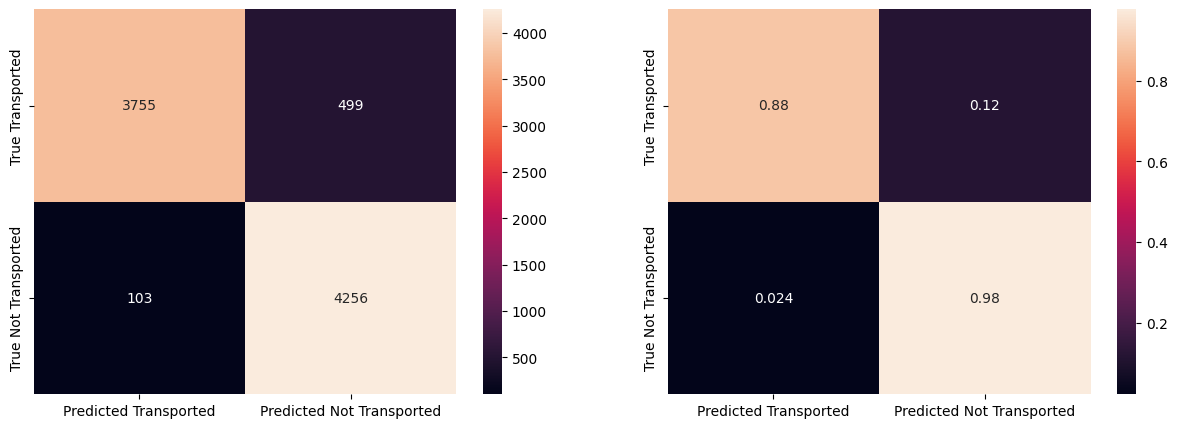

In [43]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Transported', 'Not Transported']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Transported', 'True Not Transported']
predicted_class_names = ['Predicted Transported', 'Predicted Not Transported']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [44]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,93.01
5,Random Forest,93.01
3,KNN,83.21
1,Support Vector Machines,78.87
0,Logistic Regression,77.56
7,Perceptron,75.87
8,Stochastic Gradient Decent,72.08
6,Naive Bayes,71.14
2,Linear SVC,60.07
